# Email Phishing Detection Model

## About Dataset

The Email Phishing Dataset, compiled by user Ethan Cratchley on kaggle, is a combination of two different datasets containing "safe" emails from The Enron Email Dataset, along with phishing and "safe" emails from The Phishing Email Dataset. The dataset includes features such as the number of words, unique words, stopwords, links, unique domains, email addresses, and spelling errors, along with associated labels. The purpose of this dataset is to use machine learning to train a model that would be able to detect phishing emails. Companies and corporations can use this model to identify phishing emails, preventing attacks, and protecting sensitive information and data. In addition, Cybersecurity teams can use the model to find patterns in phishing emails, allowing them to finetune and improve the model.

# Data Preprocessing


- Perform exploratory data analysis (EDA) to gain insights into the dataset's structure and distributions.
- Handle missing values, outliers, and any inconsistencies in the data.
- Encode categorical variables and normalize numerical features as necessary.
- Split the dataset into training and testing sets, ensuring a proper balance of classes.
- Discuss your applied techniques to tackle data imbalancedness if you are working on an imbalanced dataset



In [1]:
# importing initial libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# importing and reading dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['email_phishing_data.csv']))
df.head()

Saving email_phishing_data.csv to email_phishing_data.csv


,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [3]:
df.shape # check for size and shape of data set

(524846, 9)

In [4]:
df.dtypes # check for catergorical values


,0
num_words,int64
num_unique_words,int64
num_stopwords,int64
num_links,int64
num_unique_domains,int64
num_email_addresses,int64
num_spelling_errors,int64
num_urgent_keywords,int64
label,int64


In [5]:
df[df.duplicated()] # check for duplicated rows

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
12,923,355,309,0,0,0,51,0,0
14,5,5,1,0,0,0,0,0,0
25,1400,505,546,0,0,5,35,1,0
49,803,376,335,0,0,4,21,0,0
55,803,376,335,0,0,4,21,0,0
...,...,...,...,...,...,...,...,...,...
524817,28,22,0,0,0,0,5,0,0
524831,16,14,3,0,0,0,1,0,0
524837,48,37,20,0,0,0,0,0,0
524843,61,46,11,0,0,0,3,0,0


In [6]:
df.isna().sum() # check for missing values

,0
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [7]:
df.describe() # check for statistical values

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


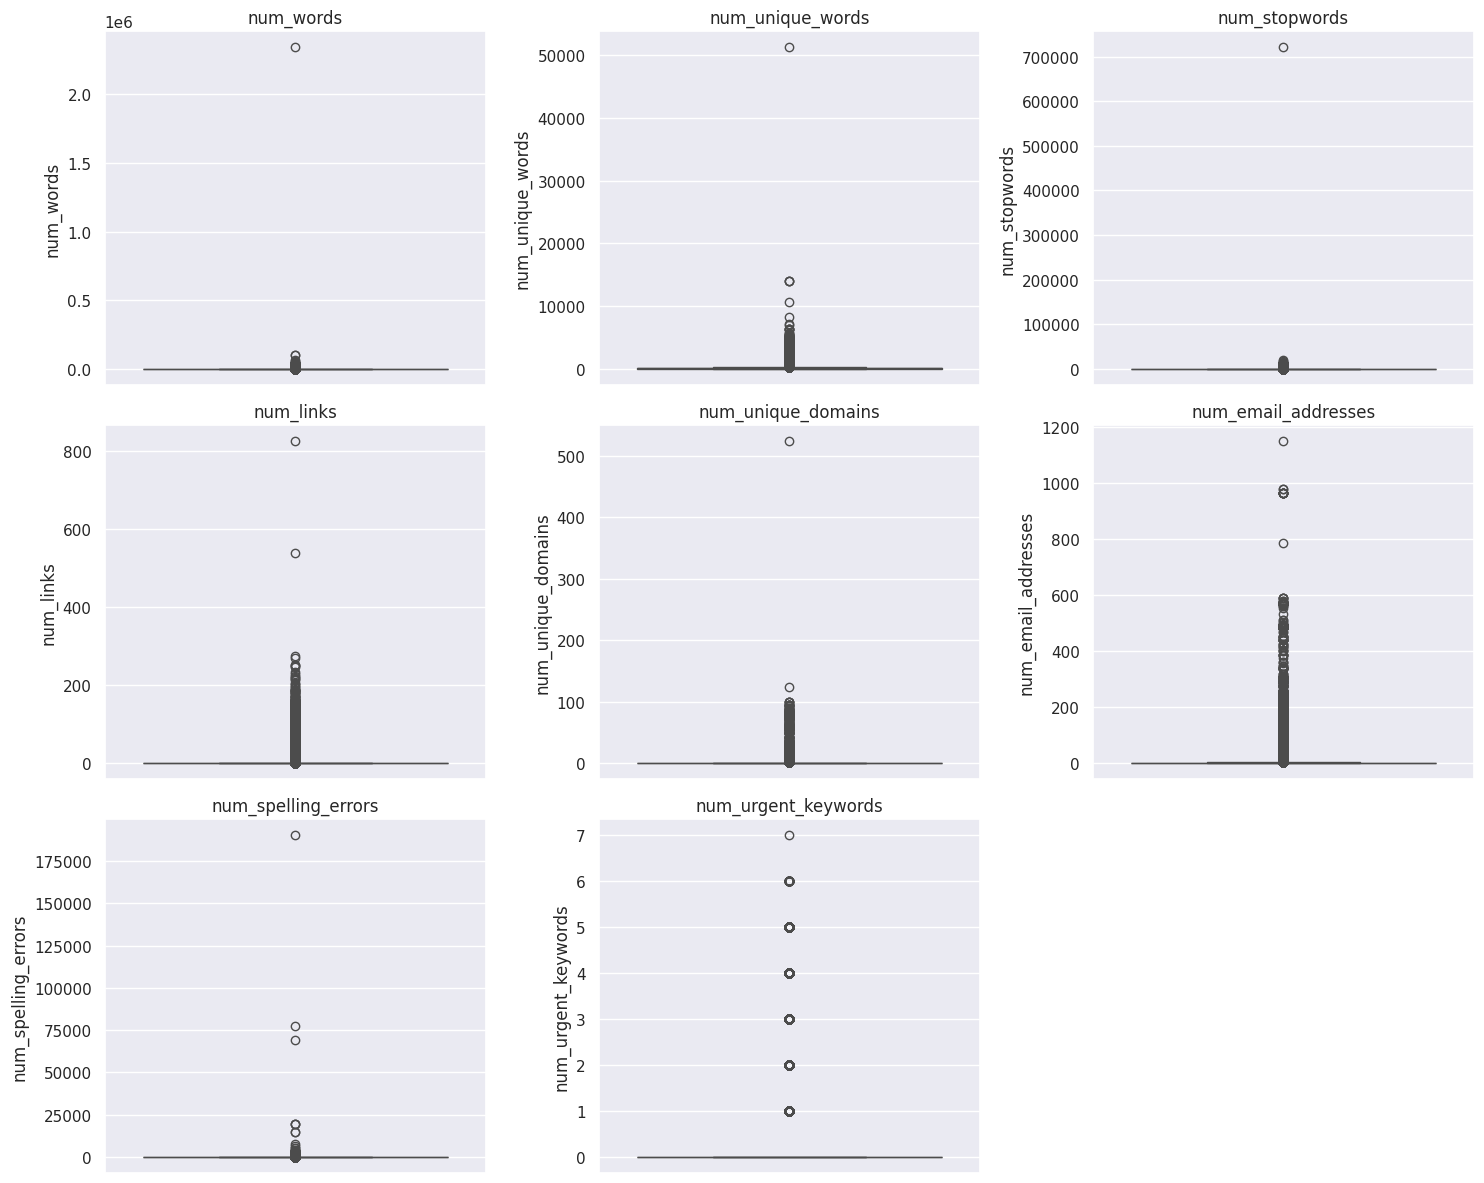

In [8]:
# visualizing columns to find outliers
numeric_cols = df.select_dtypes(include='number').columns.drop('label')

n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

# box plot for every feature
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# delete extra box plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [9]:
# scanning all frames of phishing emails ('label' = 1)
df[df['label'] == 1]

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
506799,102,75,39,2,2,0,4,0,1
506800,63,59,3,0,0,0,0,0,1
506803,1091,551,323,0,0,0,57,2,1
506804,91,74,32,0,0,0,5,1,1
506806,242,157,72,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...
524823,468,250,139,0,0,0,66,0,1
524826,101,84,10,0,0,0,26,0,1
524833,222,155,66,0,0,0,13,1,1
524836,1219,462,399,0,0,0,41,0,1


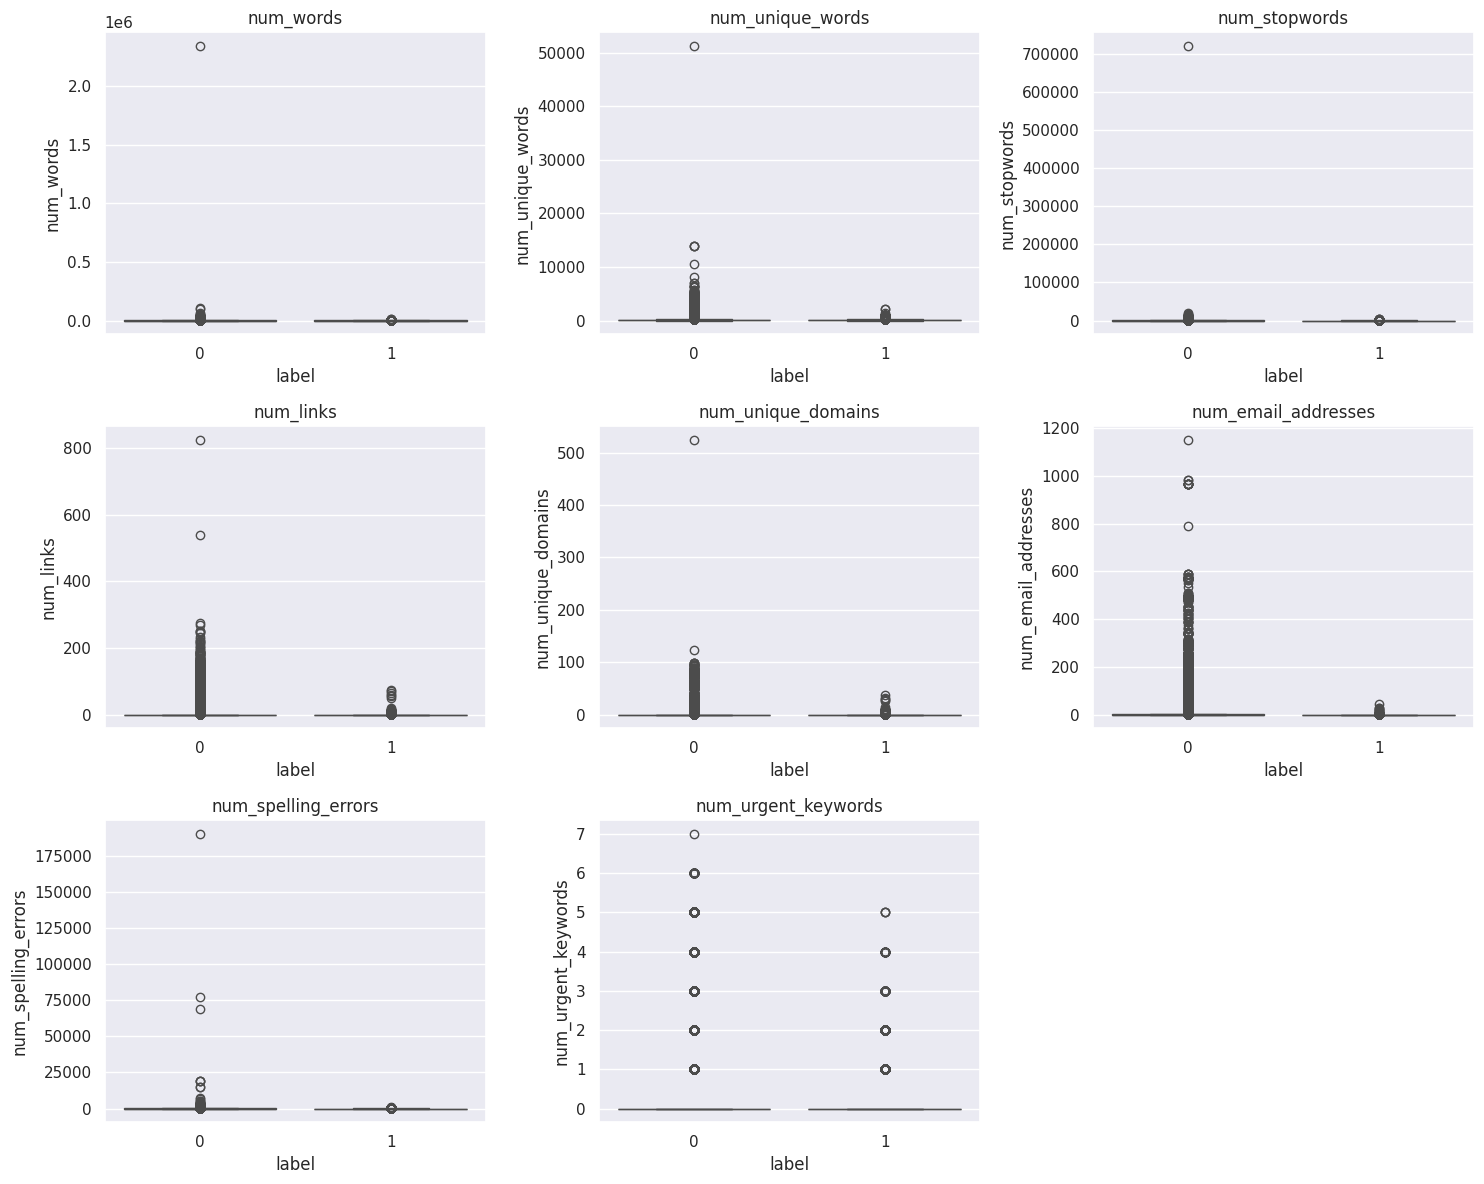

In [10]:
# visualization of column by 'label' to check for correlation of outliers and phishing emails
n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

# box plot for every feature
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='label', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# delete extra box plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [11]:
# outlier detection using z-score
from scipy.stats import zscore

z_scores = df[numeric_cols].apply(zscore)

outliers_zscore = df[(z_scores.abs() > 3).any(axis=1)]

In [12]:
# imputation of outliers using 'capping'
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[col + '_capped'] = df[col].clip(lower=lower_cap, upper=upper_cap)

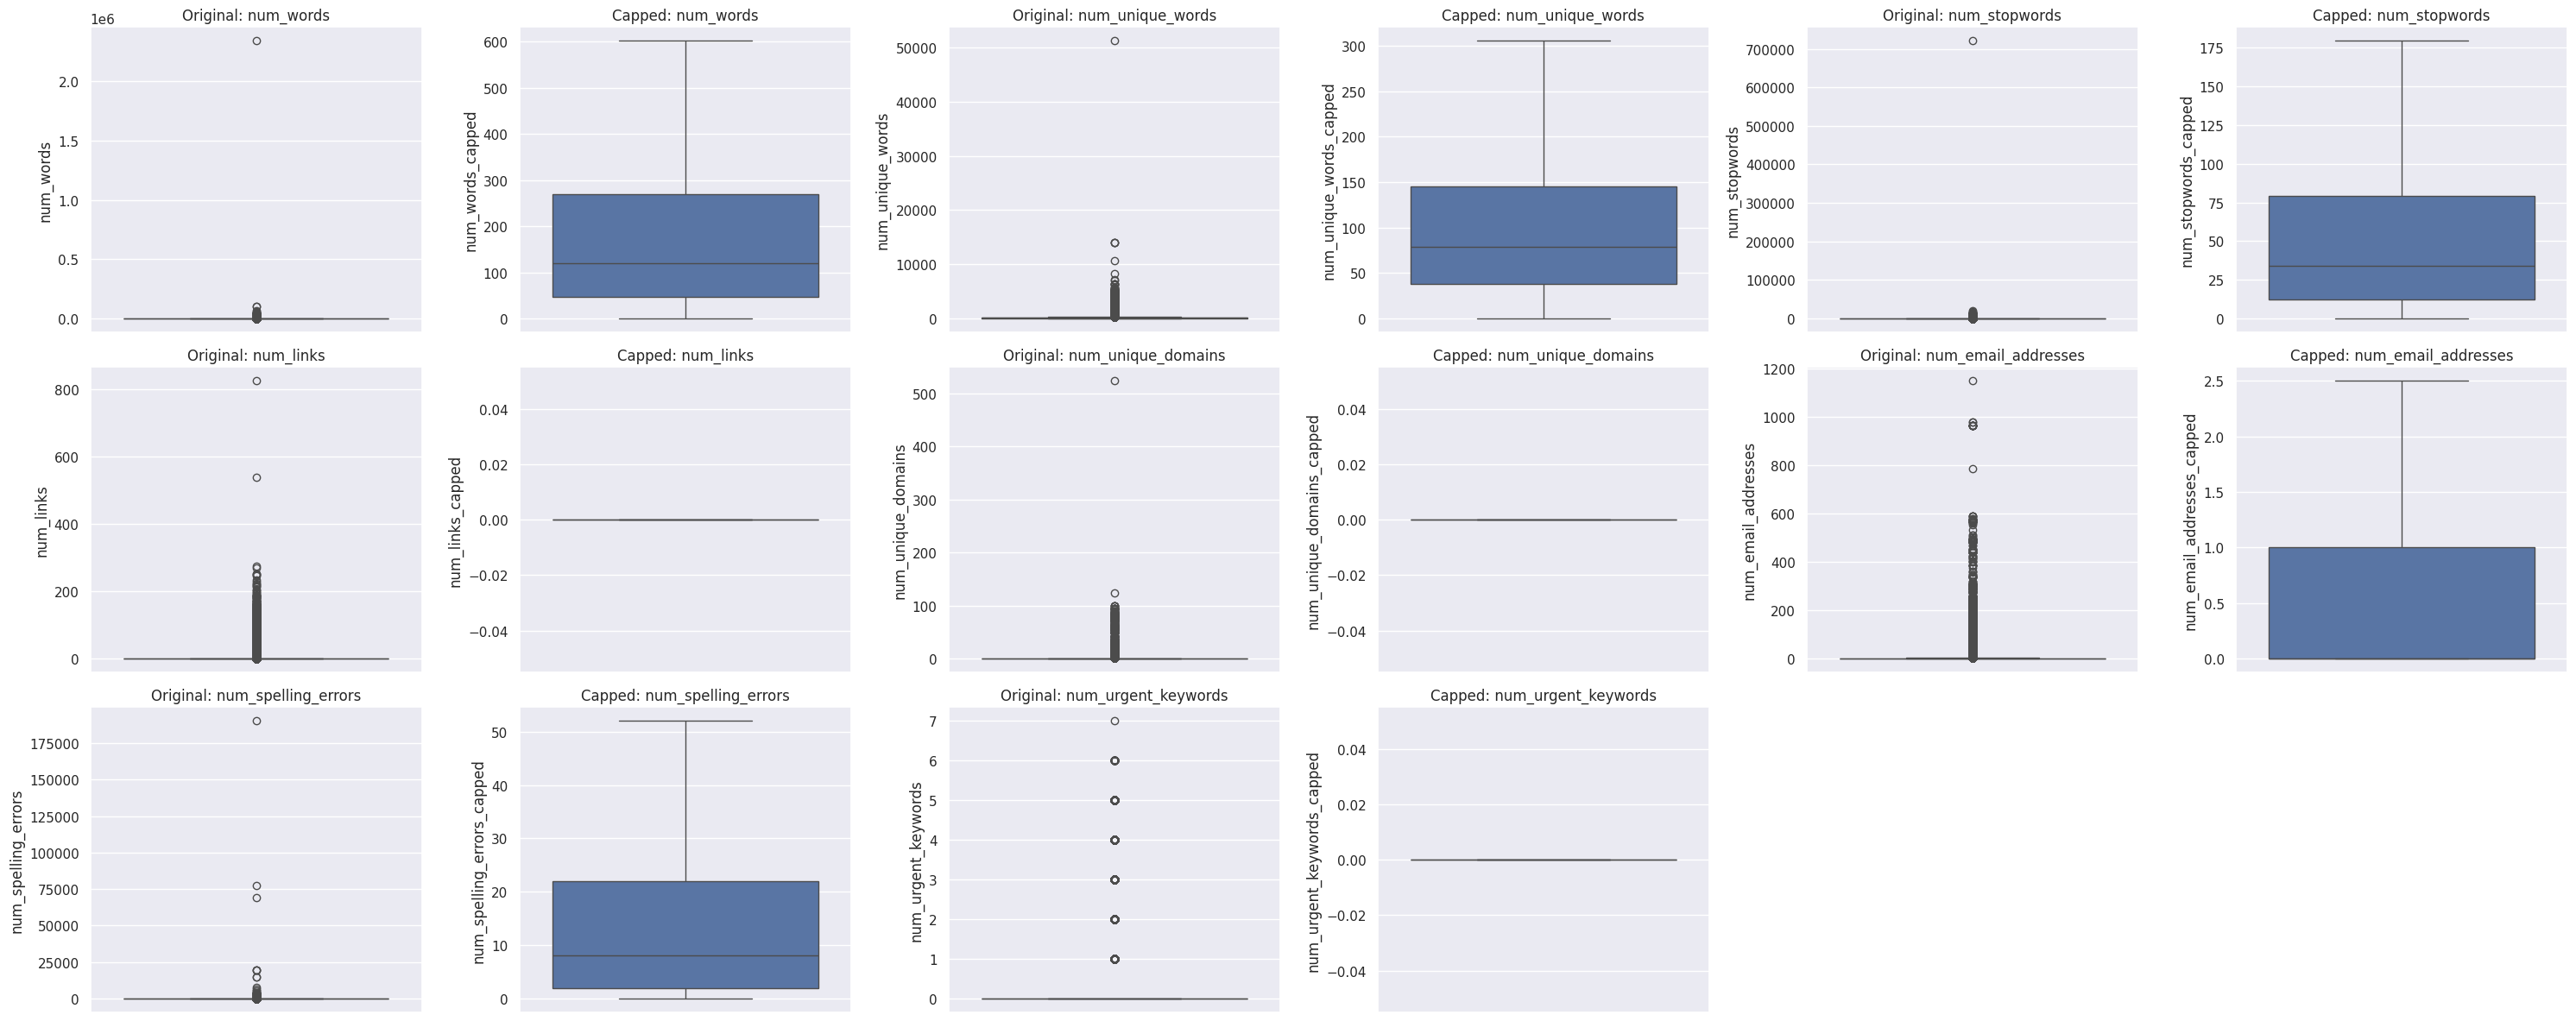

In [13]:
capped_cols = [col + '_capped' for col in numeric_cols]
n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols * 2, figsize=(cols * 10, rows * 4))  # double width for comparison
axes = axes.flatten()

# plot original and capped side-by-side
for i, col in enumerate(numeric_cols):
    # original
    sns.boxplot(y=df[col], ax=axes[2*i])
    axes[2*i].set_title(f'Original: {col}')

    # capped
    sns.boxplot(y=df[col + '_capped'], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Capped: {col}')


# remove unused
for j in range(2 * n, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

# splitting dataset into features and label
X = df.drop('label', axis=1)
y = df['label']

# splitting training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Handling Imbalanced Data Sets

There are many methods for handling imbalanced data sets. One way to handle it is to use **Synthetic Minority Over-sampling Technique (SMOTE)** to generate synthetic phishing emails. Using SMOTE over duplicating existing phishing emails would reduce the risk of overfitting the data. Another way to handle the imbalanced data set would be undersampling the majority class. Undersampling would mean randomly reducing the legitimite emails to balance the set.

I will be using a combination of both SMOTE and undersampling in order to handle my imbalanced data set.

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

print("Class distribution before SMOTE and undersampling:", Counter(y_train))

smote = SMOTE(sampling_strategy=0.5, random_state=42)

undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

resample_pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

X_resampled, y_resampled = resample_pipeline.fit_resample(X_train, y_train)

print("Class distribution after SMOTE and undersampling:", Counter(y_resampled))


Class distribution before SMOTE and undersampling: Counter({0: 414317, 1: 5559})
Class distribution after SMOTE and undersampling: Counter({0: 258947, 1: 207158})


# Model Design and Training


- Implement various classification algorithms including Decision Trees, Support Vector Machines (SVM), Deep Learning Methods (e.g., MLP, CNN, RNN, etc.), Logistic Regression, Naïve Bayes and ensemble methods such as Bagging, AdaBoost, Random Forest or XGBoost (You can choose one ensemble method to implement).
- Train each model on the training dataset and evaluate their performance using appropriate metrics.



In [16]:
# importing classification methods for Decision Tree, SVC, Logistic Regression, and Naives Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# importing ensemble method
from xgboost import XGBClassifier

# importing deep learning model
from sklearn.neural_network import MLPClassifier

In [17]:
# creating dictionary of classification models

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naives Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logless', random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

In [ ]:
# training models
for name, model in models.items():
    print(f"\nTraining with {name}")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(f"\nTraining with {name} completed!")


Training with Decision Tree

Training with Decision Tree completed!

Training with SVC
